<a href="https://colab.research.google.com/github/VictorBehrndtz/Journet-of-the-fellowship/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The MNIST dataset is a dataset of 60,000 28x28 grayscale images of the digits from 0 to 9, along with a test set of 10,000 images.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import keras
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k

Test data: Used for testing the model that how our model has been trained. 
Train data: Used to train our model.

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train: int32 NumPy array of grayscale image data with shapes (60000, 28, 28) containing the training data. Pixel values range from 0 to 255

y_train: int32 Numpy array of digit labelss(integers in range 0-9) with shape (60000,)

x_test: NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

y_test: NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

In [ ]:
img_rows, img_cols=28, 28
 
if k.image_data_format() == 'channels_first':
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   inpx = (1, img_rows, img_cols)
 
else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   inpx = (img_rows, img_cols, 1)
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Verify the data

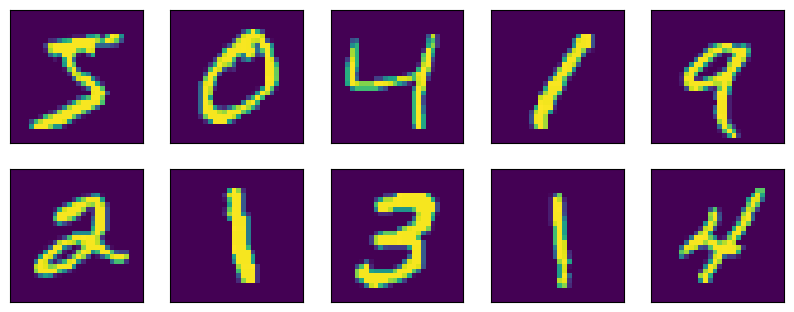

In [ ]:
class_name = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
plt.show()

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

Create convolutional base

In [ ]:

inpx = Input(shape=inpx)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)

In [ ]:

model = Model([inpx], layer7)
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
 
model.fit(x_train, y_train, epochs=12, batch_size=500)

Epoch 1/12
120/120 [==============================] - 164s 1s/step - loss: 2.3115 - accuracy: 0.1057
Epoch 2/12
120/120 [==============================] - 163s 1s/step - loss: 2.2831 - accuracy: 0.1508
Epoch 3/12
120/120 [==============================] - 162s 1s/step - loss: 1.6312 - accuracy: 0.6140
Epoch 4/12
120/120 [==============================] - 162s 1s/step - loss: 0.7665 - accuracy: 0.7790
Epoch 5/12
120/120 [==============================] - 162s 1s/step - loss: 0.5957 - accuracy: 0.8140
Epoch 6/12
120/120 [==============================] - 161s 1s/step - loss: 0.5402 - accuracy: 0.8290
Epoch 7/12
120/120 [==============================] - 163s 1s/step - loss: 0.5057 - accuracy: 0.8384
Epoch 8/12
120/120 [==============================] - 162s 1s/step - loss: 0.4814 - accuracy: 0.8465
Epoch 9/12
120/120 [==============================] - 161s 1s/step - loss: 0.4634 - accuracy: 0.8527
Epoch 10/12
120/120 [==============================] - 162s 1s/step - loss: 0.4413 - accura